# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df

# Displays all dataset which stored in df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


### **Data-Cleaning**

In [4]:
df.head()

# Display only First 5 - data from df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.columns

# Display all column name

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [6]:
df.shape

# represent 804 - rows  &  12 - columns in df

(804, 12)

In [7]:
df.isnull().sum()

# Checking for null values in df

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
df.dtypes

# checking for data_types of columns

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [9]:
numerical_features=[x for x in df.columns if df[x].dtype!="object"]
numerical_features

# splitting only numerical columns = {Int,float} from dataset

['Price',
 'Mileage',
 'Cylinder',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather']

In [10]:
categorical_features=[x for x in df.columns if df[x].dtype=="object"]
categorical_features

# splitting categorical columns = {objects / char} from dataset

['Make', 'Model', 'Trim', 'Type']

In [11]:
df['Make'].unique() 

# Gathering unique values from "Make" - column 

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [12]:
df['Model'].unique()

# Gathering unique values from "Model" - column 

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [13]:
df['Trim'].unique() 

# Gathering unique values from "Trim" - column 

array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [14]:
df['Type'].unique() 

# Gathering unique values from "Type" - column 

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

#-------------------------------***TASK - Part_1***-----------------------------------

## **Linear regression Model**

### 1.   Find the linear regression equation for mileage vs price.




In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['Mileage'].values.reshape(-1,1)
Y = df['Price'].values.reshape(-1,1)

model=LinearRegression()
model.fit(X,Y)
print("Intercept:{}, Coefficients:{}".format(model.intercept_, model.coef_))


# Import necessary module from scikit-learn package

# To Calculate Linear regrr - equation we require (Coefficient & Intercept) of model
# Inside Model we considering  "X ---> mileage"   &   "Y ---> price"

# using .format method finding the Coefficient & intercept from model

Intercept:[24764.55900606], Coefficients:[[-0.1725205]]


In [16]:
equation = "Y = {}*X  + {}".format(model.coef_[0],model.intercept_)
print("The linear equation of dataset is \n",equation)

# Y = m*x + c ----> linear equation "FORMULA" 
# here m --> Coefficient  &  c --> Intercept 

The linear equation of dataset is 
 Y = [-0.1725205]*X  + [24764.55900606]


 
### 2.   Plotting the original data and the regression line



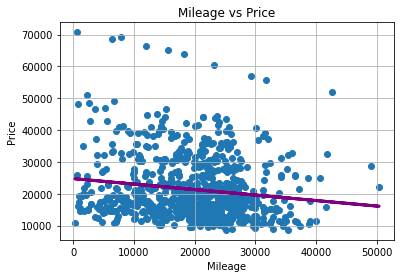

In [17]:
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="purple", linewidth=3)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.grid()
plt.show()

In [18]:
model.score(X,Y)

# R2-score ---> 0.8 and greater is considered a strong correlation.

0.02046344732348926

## **Conclusion:**

1.   R2-score = 0.0204 for model is **very low.**
2.   Since there is **no correlation** between "*mileage*" and "*price*" column



#-----------------------------------------------***TASK  -  Part_2***--------------------------------------------------



### 1.   Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

### 2.   Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)




In [19]:
input_cols = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
X = df[input_cols]

# we are taking "mileage", "cylinders", "liters", "doors", "cruise", "sound", & "leather" in form of X

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

func1 = MinMaxScaler(feature_range = (0,1))
func2 = StandardScaler()

X_norm = func1.fit_transform(X)
func2.fit(X)
X_stand = func2.transform(X) 

### **Model - 1** ---> Without normalization/Standardization

In [21]:
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))

model1.score(X,Y)


# Linear regression (model-1) ---> "without normalization/Standardization of i/p"
# we are taking "Price" in form of Y
# we are taking "input_cols" in form of X

Intercept:[6758.7551436] ,Coefficients:[[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


0.446264353672838

In [22]:
equation = "Price = {}*{}  + {}".format(input_cols, model1.coef_, model1.intercept_)
print("The linear equation is \n",equation)

# Y = m*x + c  <-------  Linea__regg FORMULA
# m ---> input column name [0 - 6 column]
# X ---> input column values respective "Coefficient" [0 - 6 column]
# C ---> "Intercept"
# Y ---> "Price" 

The linear equation is 
 Price = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']*[[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]  + [6758.7551436]


### **Model - 2** ---> With Standardization i/p

In [23]:
Y = df['Price'].values.reshape(-1,1)
model2 = LinearRegression()
model2.fit(X_stand,Y)
print("Intercept:{} ,Coefficients:{}".format(model2.intercept_, model2.coef_))

model2.score(X_stand,Y)


# Linear regression (model-2) ---> "with Standardized i/p"
# we are taking "Price" in form of Y
# we are taking "input_cols" in form of X_Stand

Intercept:[21343.14376733] ,Coefficients:[[-1390.44199315  5258.77092032  -869.77988086 -1310.7785287
   2714.12330837  -930.74494929  1497.42117515]]


0.446264353672838

In [24]:
equation = "Price = {}*{}  + {}".format(input_cols, model2.coef_, model2.intercept_)
print("The linear equation is \n",equation)

The linear equation is 
 Price = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']*[[-1390.44199315  5258.77092032  -869.77988086 -1310.7785287
   2714.12330837  -930.74494929  1497.42117515]]  + [21343.14376733]


### **Model - 3** ---> With normalization i/p

In [25]:
Y = df['Price'].values.reshape(-1,1)
model3 = LinearRegression()
model3.fit(X_norm,Y)
print("Intercept:{} ,Coefficients:{}".format(model3.intercept_, model3.coef_))

model3.score(X_norm,Y)


# Linear regression (model-3) ---> "with normalized i/p"
# we are taking "Price" in form of Y
# we are taking "input_cols" in form of X_norm

Intercept:[17538.07307995] ,Coefficients:[[-8507.93110436 15169.51572313 -3463.77121919 -3085.49169276
   6288.99714985 -1993.7952757   3349.36161961]]


0.4462643536728379

In [26]:
equation = "Price = {}*{}  + {}".format(input_cols, model3.coef_, model3.intercept_)
print("The linear equation is \n",equation)

The linear equation is 
 Price = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']*[[-8507.93110436 15169.51572313 -3463.77121919 -3085.49169276
   6288.99714985 -1993.7952757   3349.36161961]]  + [17538.07307995]


### **CONCLUSION:-**

1.   From Model-1, Model-2, Model-3 the model score have no effect. 
2.   Moreover all 3-models have similar **R2_score = 0.446** which is "*not_good fit*"


### 3.Find the combination of the factors that is the best predictor for price.

In [27]:
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

# To know combinations of input columns

In [28]:
combos = input_combos(input_cols)

In [29]:
def combo_r2scores( all_combos, df, output='Price'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Price']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [30]:
combo_r2scores(combos,df,'Price')

{0.02046344732348926: ('Mileage',),
 0.32385903759512247: ('Cylinder',),
 0.31152674427904503: ('Liter',),
 0.019251466591467037: ('Doors',),
 0.1856330092969276: ('Cruise',),
 0.015462387624189389: ('Sound',),
 0.024710851264124534: ('Leather',),
 0.33982070826367505: ('Mileage', 'Cylinder'),
 0.3291279066854156: ('Mileage', 'Liter'),
 0.04039914867118721: ('Mileage', 'Doors'),
 0.2093138558315858: ('Mileage', 'Cruise'),
 0.03688121596735017: ('Mileage', 'Sound'),
 0.04521956340886857: ('Mileage', 'Leather'),
 0.32591551601566593: ('Cylinder', 'Liter'),
 0.343460536583038: ('Cylinder', 'Doors'),
 0.3839491324027344: ('Cylinder', 'Cruise'),
 0.32927527347959384: ('Cylinder', 'Sound'),
 0.33698000644980597: ('Cylinder', 'Leather'),
 0.32051564077668315: ('Liter', 'Doors'),
 0.3680458490296844: ('Liter', 'Cruise'),
 0.31926427639502897: ('Liter', 'Sound'),
 0.32337917189904186: ('Liter', 'Leather'),
 0.1996382468921617: ('Doors', 'Cruise'),
 0.03701628770903431: ('Doors', 'Sound'),
 0.04

### **CONCLUSION:**
Combination of all 7 input fields produce the highest **R2_score = 0.446**

# -----------------------------------------------***TASK -  HARD mode***--------------------------------------------------



1.   Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2.   Find the best combination of factors to predict price.



In [31]:
df1 = df.copy()

In [32]:
df1[['Make','Model','Type']] = df1[['Make','Model','Type']].astype('category')
df1.dtypes

Price        float64
Mileage        int64
Make        category
Model       category
Trim          object
Type        category
Cylinder       int64
Liter        float64
Doors          int64
Cruise         int64
Sound          int64
Leather        int64
dtype: object

In [33]:
df1['Make'] = df1['Make'].cat.codes
df1['Model'] = df1['Model'].cat.codes
df1['Type'] = df1['Type'].cat.codes
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [34]:
input_cols = ['Mileage','Cylinder','Make','Model','Type','Liter','Doors','Cruise','Sound','Leather']

X = df1[input_cols]
Y = df1['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)

print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[3039.64350271] ,Coefficients:[[-1.71673657e-01  4.87578755e+03  8.32075788e+02 -2.05034394e+02
   4.31124572e+01 -8.92252597e+02 -1.50175555e+03  5.14099964e+03
  -1.33287926e+03  2.77089529e+03]]


0.48569139005488504

In [35]:
combos = input_combos(input_cols)

In [36]:
def combo_r2scores( all_combos, df, output='Price'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Price']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [37]:
output_dict = combo_r2scores(combos,df1,'Price')

In [38]:
max(output_dict)

0.48569139005488504

In [41]:
output_dict[0.48569139005488504] 

# Provides Max - R2score

('Mileage',
 'Cylinder',
 'Make',
 'Model',
 'Type',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather')


*  No improvements while using encoding of make,model & type
*  Its an very slight improvement from *0.44 to 0.48*



<AxesSubplot:>

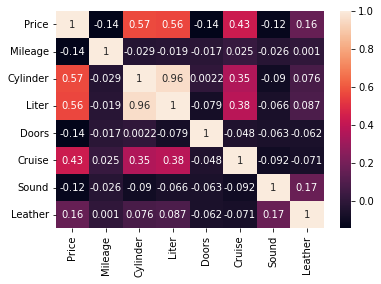

In [42]:
sns.heatmap(df.corr(), annot=True)

#Cylinder & liter are high positive correletated


### 1.   Using Label - Encoding


In [43]:
df1 = df.copy()

In [44]:
df1['Model'] = df1['Model'].astype('category')
df1['Model'] = df1['Model'].cat.codes

In [45]:
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])

In [46]:
input_cols=['Mileage', 'Cylinder','Liter','Model','Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [47]:
X = df_dummies[input_cols]

In [48]:
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[23377.98090878] ,Coefficients:[[-1.84575188e-01 -1.25812618e+03  5.68575195e+03  5.86830951e+01
  -2.09123334e+03  1.81499295e+02  2.05060415e+02  2.89961148e+02
  -3.96158031e+03  1.22141649e+04 -5.27969841e+03 -5.52735103e+03
   7.75088755e+03 -5.19642271e+03  6.49494131e+03 -5.44932464e+03
  -1.57653214e+03 -1.46170953e+03  1.99262500e+03]]


0.9376502168807379



*   Here using *label encoding* we get **R2_Score = 0.937** which is Good fit.





### 2.   Without Label - Encoding

In [49]:
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])

In [50]:
input_cols=['Mileage', 'Cylinder','Liter','Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [51]:
X = df_dummies[input_cols]

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)

print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[23983.77190962] ,Coefficients:[[-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
   1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
   1.22732515e+04 -5.33495094e+03 -5.47974129e+03  6.95098389e+03
  -4.82285042e+03  6.52818455e+03 -5.49471851e+03 -1.71994175e+03
  -1.69110942e+03  2.37758514e+03]]


0.9363889951039477


*   R2_score *differences of 0.001* if we using "Model" field.


## **CONCLUSION:-**
### >The combination of 'Mileage', 'Cylinder','Liter','Doors', 'Cruise','Sound','Leather','Make' and 'Type' is *best combination of features* for the "linear regression model".